In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import numpy as np
from load_data_and_distribution_analisys import load_dataset_cleaned, plot_confusion_matrix, split_dataset_v1

/Users/marcodeano/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/marcodeano/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
dataset = load_dataset_cleaned()

Path to dataset files: /Users/marcodeano/.cache/kagglehub/datasets/sooyoungher/smoking-drinking-dataset/versions/2


# Predizioni

In [ ]:
X_smoke, y_smoke, X_drink, y_drink = split_dataset_v1(dataset)

## Independent targets

In [ ]:
X_train_smoke, X_test_smoke, y_train_smoke, y_test_smoke = train_test_split(X_smoke, y_smoke, test_size=0.2, random_state=42, stratify=y_smoke)

In [16]:
X_train_smoke_first_step = X_train_smoke.copy()
y_train_smoke_first_step = (y_train_smoke != 1).astype(int)

y_test_smoke_first_step = (y_test_smoke != 1).astype(int)

X_train_smoke_second_step = X_train_smoke.copy()
y_train_smoke_second_step = y_train_smoke.copy()

In [17]:
# scale the data
scaler = StandardScaler()

X_train_smoke_first_step_scaled = scaler.fit_transform(X_train_smoke_first_step)
X_test_smoke_scaled = scaler.transform(X_test_smoke)
X_train_smoke_second_step_scaled = scaler.fit_transform(X_train_smoke_second_step)

In [18]:
first_step = LinearSVC(class_weight='balanced', random_state=42)

In [19]:
first_step.fit(X_train_smoke_first_step_scaled, y_train_smoke_first_step)

LinearSVC(class_weight='balanced', random_state=42)

In [20]:
second_step = LinearSVC(class_weight='balanced', random_state=42)
# second_step = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)


In [21]:
second_step.fit(X_train_smoke_second_step_scaled, y_train_smoke_second_step)

LinearSVC(class_weight='balanced', random_state=42)

In [ ]:
first_step_preds = first_step.predict(X_test_smoke_scaled)

print(classification_report(y_test_smoke_first_step, first_step_preds))

plot_confusion_matrix(y_train_smoke_first_step, first_step_preds, first_step.classes_, 'First Step Confusion Matrix')

In [21]:
non_smokers = X_test_smoke[first_step_preds == 0]
possible_smokers = X_test_smoke[first_step_preds == 1]

possible_smokers_scaled = scaler.transform(possible_smokers)

In [22]:
second_step_preds = second_step.predict(possible_smokers_scaled)
print(np.unique(second_step_preds, return_counts=True))

(array([1., 2., 3.]), array([   31, 42253, 53500], dtype=int64))


              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    111704
         2.0       0.41      0.55      0.47     31616
         3.0       0.48      0.65      0.55     39085

    accuracy                           0.68    182405
   macro avg       0.61      0.64      0.61    182405
weighted avg       0.75      0.68      0.70    182405



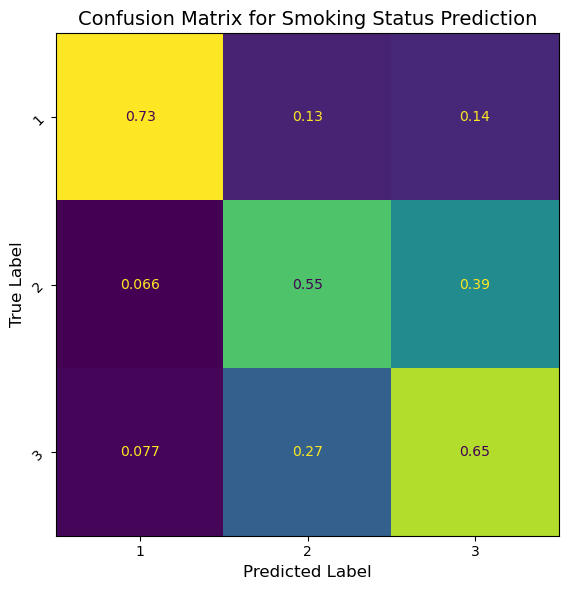

In [23]:
# Combine the predictions
final_preds = first_step_preds.copy()

final_preds[first_step_preds == 1] = second_step_preds
final_preds[final_preds == 0] = 1

report = classification_report(y_test_smoke, final_preds)
print(report)

plot_confusion_matrix(y_test_smoke, final_preds, [1, 2, 3], 'Confusion Matrix for Smoking Status Prediction')